{10: 0.44000000000000006, 20: 0.44000000000000006, 50: 0.48, 100: 0.43999999999999995}


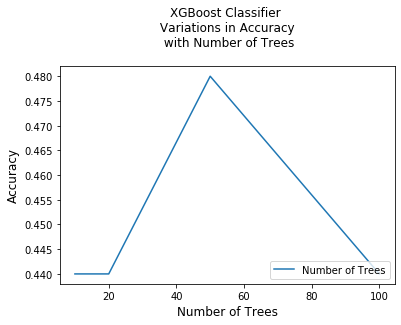

None

 {10: 0.44000000000000006, 20: 0.44000000000000006, 50: 0.48, 100: 0.43999999999999995}
Number of trees 10 ----> Accuracy Score = 0.44000000000000006
Number of trees 20 ----> Accuracy Score = 0.44000000000000006
Number of trees 50 ----> Accuracy Score = 0.48
Number of trees 100 ----> Accuracy Score = 0.43999999999999995
{2: 0.43999999999999995, 3: 0.43999999999999995, 4: 0.43999999999999995, 5: 0.43999999999999995, 10: 0.43999999999999995}


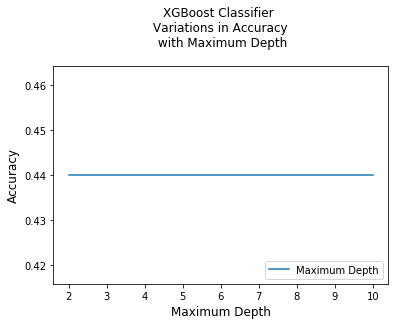

None

 {2: 0.43999999999999995, 3: 0.43999999999999995, 4: 0.43999999999999995, 5: 0.43999999999999995, 10: 0.43999999999999995}
Maximum Depth 2 ----> Accuracy Score = 0.43999999999999995
Maximum Depth 3 ----> Accuracy Score = 0.43999999999999995
Maximum Depth 4 ----> Accuracy Score = 0.43999999999999995
Maximum Depth 5 ----> Accuracy Score = 0.43999999999999995
Maximum Depth 10 ----> Accuracy Score = 0.43999999999999995


In [2]:
"""
XGBoost Classifier

"""

import pandas as pd
from sklearn import model_selection
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import numpy as np

class XGBoost_Classifier():
    def __init__(self):
        self.max_depth = [2,3,4,5,10]
        self.trees = [10,20,50,100]
    
    def dataset_split(self):
        df = pd.read_csv("dp6.csv")  
        X = df.drop('Y',axis=1)
        y = df.Y
        return X,y

    def model_creation(self):
        acc_score = {}       
        for i in self.trees:    
            kfold = model_selection.KFold(n_splits=5)
            model = XGBClassifier(n_estimators = i)
            results = model_selection.cross_val_score(model, X, y, cv=kfold)
            acc_score[i]=results.mean()
        print(acc_score)

        return acc_score
    
    def model_creation2(self):
        acc_score = {}       
        for i in self.max_depth:    
            kfold = model_selection.KFold(n_splits=5)
            model = XGBClassifier(n_estimators = 100, max_depth=i)
            results = model_selection.cross_val_score(model, X, y, cv=kfold)
            acc_score[i]=results.mean()
        print(acc_score)

        return acc_score
    
    def graph(self, acc_score):
        names = list(acc_score.keys())
        values = list(acc_score.values())
        plt.plot(names,values)
        plt.title("XGBoost Classifier \n Variations in Accuracy \n with Number of Trees", pad=20)
        plt.ylabel("Accuracy", fontsize = "large")
        plt.xlabel('Number of Trees', fontsize = "large")
        plt.legend(["Number of Trees"], loc='lower right')
        plt.show()
        
    def graph2(self, m_acc_score):
        names = list(m_acc_score.keys())
        values = list(m_acc_score.values())
        plt.plot(names,values)
        plt.title("XGBoost Classifier \n Variations in Accuracy \n with Maximum Depth", pad=20)
        plt.ylabel("Accuracy", fontsize = "large")
        plt.xlabel("Maximum Depth", fontsize = "large")
        plt.legend(["Maximum Depth"], loc='lower right')
        plt.show()



xg_cla = XGBoost_Classifier()
X,y = xg_cla.dataset_split()
acc_score = xg_cla.model_creation()
print(xg_cla.graph(acc_score))

print("\n",acc_score)

for x,y in acc_score.items():
    print("Number of trees {0} ----> Accuracy Score = {1}". format (x, np.mean(acc_score[x])) )

xg_cla1 = XGBoost_Classifier()
X,y = xg_cla1.dataset_split()
m_acc_score = xg_cla1.model_creation2()
print(xg_cla1.graph2(m_acc_score))

print("\n",m_acc_score)

for x,y in m_acc_score.items():
    print("Maximum Depth {0} ----> Accuracy Score = {1}". format (x, np.mean(m_acc_score[x])) )


In [ ]:
pip install xgboost